In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as  plt
import seaborn as sns

import random
from random import sample

pd.set_option('display.max_columns', 1000)
from scipy.interpolate import interp1d
from scipy import interpolate as inter
import scipy.stats
from pandas.plotting import table 
import dataframe_image as dfi

from PIL import Image
pd.set_option('mode.chained_assignment',None)

In [2]:
metabolic = pd.read_csv('metabolic_corr.csv',index_col=0)

In [3]:
display(metabolic.head(20))
display(metabolic.tail(20))


TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                               1.000000   
TAdipose - SubcutaneousM032G001                               0.026020   
TAdipose - SubcutaneousM038G001                               0.532636   
TAdipose - Visceral (Omentum)M010G001                        -0.011745   
TAdipose - Visceral (Omentum)M024G001                        -0.138855   
TAdipose - Visceral (Omentum)M025G001                         0.134702   
TArtery - AortaM020G001                                       0.125879   
TArtery - AortaM029G001                                      -0.189432   
TArtery - AortaM031G001                                      -0.121794   
TArtery - TibialM026G001                                      0.113968   
TArtery - TibialM029G001                                      0.026996   
TArtery - TibialM035G001                                      0.186529   
TBreast - Mammary TissueM016G001                              0.158429   
TBreast - Mammary TissueM017G001                              0.222070   
TCells - Cultured fibroblastsM002G001                         0.027928   
TEsophagus - MucosaM022G001                                  -0.074932   
TEsophagus - MuscularisM019G001                               0.206707   
TEsophagus - MuscularisM035G001                              -0.113269   
THeart - Atrial AppendageM003G001                            -0.034198   
THeart - Atrial AppendageM025G001                             0.049718   

                                       TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                               0.026020   
TAdipose - SubcutaneousM032G001                               1.000000   
TAdipose - SubcutaneousM038G001                               0.210703   
TAdipose - Visceral (Omentum)M010G001                        -0.009905   
TAdipose - Visceral (Omentum)M024G001                        -0.014830   
TAdipose - Visceral (Omentum)M025G001                        -0.039940   
TArtery - AortaM020G001                                       0.145727   
TArtery - AortaM029G001                                      -0.055024   
TArtery - AortaM031G001                                      -0.101602   
TArtery - TibialM026G001                                      0.254089   
TArtery - TibialM029G001                                     -0.419236   
TArtery - TibialM035G001                                     -0.234707   
TBreast - Mammary TissueM016G001                             -0.020976   
TBreast - Mammary TissueM017G001                             -0.068390   
TCells - Cultured fibroblastsM002G001                        -0.135748   
TEsophagus - MucosaM022G001                                   0.040805   
TEsophagus - MuscularisM019G001                               0.114444   
TEsophagus - MuscularisM035G001                              -0.126502   
THeart - Atrial AppendageM003G001                             0.118740   
THeart - Atrial AppendageM025G001                             0.077329   

                                       TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                               0.532636   
TAdipose - SubcutaneousM032G001                               0.210703   
TAdipose - SubcutaneousM038G001                               1.000000   
TAdipose - Visceral (Omentum)M010G001                        -0.324818   
TAdipose - Visceral (Omentum)M024G001                         0.011537   
TAdipose - Visceral (Omentum)M025G001                        -0.094004   
TArtery - AortaM020G001                                      -0.275146   
TArtery - AortaM029G001                                      -0.079593   
TArtery - AortaM031G001                                      -0.141973   
TArtery - TibialM026G001                                      0.396750   
TArtery - TibialM029G001                                     -0.412570   
TArtery - TibialM035G001                 

TAdipose - SubcutaneousM003G001  \
THeart - Left VentricleM003G001                                     -0.032000   
TLiverM010G001                                                      -0.084974   
TLiverM036G001                                                      -0.136013   
TLiverM038G001                                                      -0.125759   
TLungM001G001                                                       -0.100938   
TLungM004G001                                                       -0.072336   
TLungM015G001                                                       -0.109424   
TLungM025G001                                                        0.171658   
TMuscle - SkeletalM007G001                                           0.156986   
TNerve - TibialM012G001                                             -0.019363   
TNerve - TibialM017G001                                             -0.150561   
TSkin - Not Sun Exposed (Suprapubic)M006G001                         0.130140   
TSkin - Not Sun Exposed (Suprapubic)M013G001                        -0.049229   
TSkin - Sun Exposed (Lower leg)M024G001                             -0.008718   
TSkin - Sun Exposed (Lower leg)M036G001                              0.083376   
TTestisM002G001                                                      0.008517   
TThyroidM018G001                                                     0.017593   
TThyroidM032G001                                                    -0.005457   
TWhole BloodM002G001                                                -0.069071   
TWhole BloodM007G001                                                -0.112304   

                                              TAdipose - SubcutaneousM032G001  \
THeart - Left VentricleM003G001                                     -0.127054   
TLiverM010G001                                                      -0.083299   
TLiverM036G001                                                      -0.100977   
TLiverM038G001                                                       0.019475   
TLungM001G001                                                       -0.192514   
TLungM004G001                                                       -0.018581   
TLungM015G001                                                        0.141619   
TLungM025G001                                                        0.048976   
TMuscle - SkeletalM007G001                                          -0.168553   
TNerve - TibialM012G001                                              0.016797   
TNerve - TibialM017G001                                             -0.116788   
TSkin - Not Sun Exposed (Suprapubic)M006G001                        -0.158013   
TSkin - Not Sun Exposed (Suprapubic)M013G001                         0.058744   
TSkin - Sun Exposed (Lower leg)M024G001                              0.079590   
TSkin - Sun Exposed (Lower leg)M036G001                             -0.045184   
TTestisM002G001                                                     -0.094100   
TThyroidM018G001                                                     0.021687   
TThyroidM032G001                                                    -0.107820   
TWhole BloodM002G001                                                -0.033059   
TWhole BloodM007G001                                                 0.130825   

                                              TAdipose - SubcutaneousM038G001  \
THeart - Left VentricleM003G001                                     -0.127083   
TLiverM010G001                                                      -0.230754   
TLiverM036G001                                                      -0.372227   
TLiverM038G001                                                      -0.502258   
TLungM001G001                                                        0.009424   
TLungM004G001                                                        0.092035   
TLungM015G001                                                        0.0032

In [4]:
metabolic = metabolic.dropna(axis=0,how='all')
metabolic = metabolic.dropna(axis=1,how='all')
#metabolic = metabolic.dropna(axis=0,how='any')
#metabolic = metabolic.dropna(axis=1,how='any')


In [5]:
display(metabolic.head(20))
display(metabolic.tail(20))


TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                               1.000000   
TAdipose - SubcutaneousM032G001                               0.026020   
TAdipose - SubcutaneousM038G001                               0.532636   
TAdipose - Visceral (Omentum)M010G001                        -0.011745   
TAdipose - Visceral (Omentum)M024G001                        -0.138855   
TAdipose - Visceral (Omentum)M025G001                         0.134702   
TArtery - AortaM020G001                                       0.125879   
TArtery - AortaM029G001                                      -0.189432   
TArtery - AortaM031G001                                      -0.121794   
TArtery - TibialM026G001                                      0.113968   
TArtery - TibialM029G001                                      0.026996   
TArtery - TibialM035G001                                      0.186529   
TBreast - Mammary TissueM016G001                              0.158429   
TBreast - Mammary TissueM017G001                              0.222070   
TCells - Cultured fibroblastsM002G001                         0.027928   
TEsophagus - MucosaM022G001                                  -0.074932   
TEsophagus - MuscularisM019G001                               0.206707   
TEsophagus - MuscularisM035G001                              -0.113269   
THeart - Atrial AppendageM003G001                            -0.034198   
THeart - Atrial AppendageM025G001                             0.049718   

                                       TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                               0.026020   
TAdipose - SubcutaneousM032G001                               1.000000   
TAdipose - SubcutaneousM038G001                               0.210703   
TAdipose - Visceral (Omentum)M010G001                        -0.009905   
TAdipose - Visceral (Omentum)M024G001                        -0.014830   
TAdipose - Visceral (Omentum)M025G001                        -0.039940   
TArtery - AortaM020G001                                       0.145727   
TArtery - AortaM029G001                                      -0.055024   
TArtery - AortaM031G001                                      -0.101602   
TArtery - TibialM026G001                                      0.254089   
TArtery - TibialM029G001                                     -0.419236   
TArtery - TibialM035G001                                     -0.234707   
TBreast - Mammary TissueM016G001                             -0.020976   
TBreast - Mammary TissueM017G001                             -0.068390   
TCells - Cultured fibroblastsM002G001                        -0.135748   
TEsophagus - MucosaM022G001                                   0.040805   
TEsophagus - MuscularisM019G001                               0.114444   
TEsophagus - MuscularisM035G001                              -0.126502   
THeart - Atrial AppendageM003G001                             0.118740   
THeart - Atrial AppendageM025G001                             0.077329   

                                       TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                               0.532636   
TAdipose - SubcutaneousM032G001                               0.210703   
TAdipose - SubcutaneousM038G001                               1.000000   
TAdipose - Visceral (Omentum)M010G001                        -0.324818   
TAdipose - Visceral (Omentum)M024G001                         0.011537   
TAdipose - Visceral (Omentum)M025G001                        -0.094004   
TArtery - AortaM020G001                                      -0.275146   
TArtery - AortaM029G001                                      -0.079593   
TArtery - AortaM031G001                                      -0.141973   
TArtery - TibialM026G001                                      0.396750   
TArtery - TibialM029G001                                     -0.412570   
TArtery - TibialM035G001                 

TAdipose - SubcutaneousM003G001  \
THeart - Left VentricleM003G001                                     -0.032000   
TLiverM010G001                                                      -0.084974   
TLiverM036G001                                                      -0.136013   
TLiverM038G001                                                      -0.125759   
TLungM001G001                                                       -0.100938   
TLungM004G001                                                       -0.072336   
TLungM015G001                                                       -0.109424   
TLungM025G001                                                        0.171658   
TMuscle - SkeletalM007G001                                           0.156986   
TNerve - TibialM012G001                                             -0.019363   
TNerve - TibialM017G001                                             -0.150561   
TSkin - Not Sun Exposed (Suprapubic)M006G001                         0.130140   
TSkin - Not Sun Exposed (Suprapubic)M013G001                        -0.049229   
TSkin - Sun Exposed (Lower leg)M024G001                             -0.008718   
TSkin - Sun Exposed (Lower leg)M036G001                              0.083376   
TTestisM002G001                                                      0.008517   
TThyroidM018G001                                                     0.017593   
TThyroidM032G001                                                    -0.005457   
TWhole BloodM002G001                                                -0.069071   
TWhole BloodM007G001                                                -0.112304   

                                              TAdipose - SubcutaneousM032G001  \
THeart - Left VentricleM003G001                                     -0.127054   
TLiverM010G001                                                      -0.083299   
TLiverM036G001                                                      -0.100977   
TLiverM038G001                                                       0.019475   
TLungM001G001                                                       -0.192514   
TLungM004G001                                                       -0.018581   
TLungM015G001                                                        0.141619   
TLungM025G001                                                        0.048976   
TMuscle - SkeletalM007G001                                          -0.168553   
TNerve - TibialM012G001                                              0.016797   
TNerve - TibialM017G001                                             -0.116788   
TSkin - Not Sun Exposed (Suprapubic)M006G001                        -0.158013   
TSkin - Not Sun Exposed (Suprapubic)M013G001                         0.058744   
TSkin - Sun Exposed (Lower leg)M024G001                              0.079590   
TSkin - Sun Exposed (Lower leg)M036G001                             -0.045184   
TTestisM002G001                                                     -0.094100   
TThyroidM018G001                                                     0.021687   
TThyroidM032G001                                                    -0.107820   
TWhole BloodM002G001                                                -0.033059   
TWhole BloodM007G001                                                 0.130825   

                                              TAdipose - SubcutaneousM038G001  \
THeart - Left VentricleM003G001                                     -0.127083   
TLiverM010G001                                                      -0.230754   
TLiverM036G001                                                      -0.372227   
TLiverM038G001                                                      -0.502258   
TLungM001G001                                                        0.009424   
TLungM004G001                                                        0.092035   
TLungM015G001                                                        0.0032

In [6]:
print(metabolic.shape)
met_shape = metabolic.shape[0]

(40, 40)


In [ ]:
add_epsilon = 0.5

In [7]:
corr_thresholds = list(range(200, 502, 5))
myInt = 1000
corr_thresholds[:] = [x / myInt for x in corr_thresholds]
print(corr_thresholds)
print(len(corr_thresholds))

pos_cases = [0]*61
neg_cases = [0]*61
ratio_pos_neg = [0]*61



[0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5]
61


In [8]:
corrlist = []
metabolic_indexes = metabolic.index.tolist()
metabolic_columns = metabolic.columns.tolist()

for i in range(metabolic.shape[0]):
    for j in range(i+1,metabolic.shape[1]):
        meti = metabolic_indexes[i]
        metj = metabolic_columns[j]
        meti = meti[1:-8]
        metj = metj[1:-8]
        if meti !=metj:
            corrlist.append(metabolic.iloc[i,j])
        
inter_met_corr = len(corrlist)
print(inter_met_corr)



751


In [9]:
d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,
     'ratio pos neg' : ratio_pos_neg}
     
df_metabolic = pd.DataFrame(d)


for i in range(df_metabolic.shape[0]):
    count_pos = 1.0
    count_neg = 1.0
    for j in range(len(corrlist)):
        if corrlist[j] >= df_metabolic['corr thresholds'].iloc[i]:
            count_pos +=1
    for j in range(len(corrlist)):
        if corrlist[j] <= -df_metabolic['corr thresholds'].iloc[i]:
            count_neg +=1
    df_metabolic['pos cases'].iloc[i] = count_pos
    df_metabolic['neg cases'].iloc[i] = count_neg
    df_metabolic['ratio pos neg'].iloc[i] = count_pos / max(count_neg,1)
    
display(df_metabolic.head(33))   
                   
        

corr thresholds  pos cases  neg cases  ratio pos neg
0             0.200         78         50       1.560000
1             0.205         74         47       1.574468
2             0.210         72         42       1.714286
3             0.215         68         39       1.743590
4             0.220         64         35       1.828571
5             0.225         62         34       1.823529
6             0.230         59         33       1.787879
7             0.235         58         26       2.230769
8             0.240         55         24       2.291667
9             0.245         55         24       2.291667
10            0.250         52         24       2.166667
11            0.255         48         23       2.086957
12            0.260         48         23       2.086957
13            0.265         43         22       1.954545
14            0.270         38         20       1.900000
15            0.275         33         19       1.736842
16            0.280         31         17       1.823529
17            0.285         30         15       2.000000
18            0.290         28         15       1.866667
19            0.295         27         15       1.800000
20            0.300         27         14       1.928571
21            0.305         27         12       2.250000
22            0.310         24         11       2.181818
23            0.315         23         11       2.090909
24            0.320         22         10       2.200000
25            0.325         21          9       2.333333
26            0.330         20          9       2.222222
27            0.335         19          8       2.375000
28            0.340         18          8       2.250000
29            0.345         17          8       2.125000
30            0.350         17          8       2.125000
31            0.355         16          8       2.000000
32            0.360         16          8       2.000000

In [10]:
display(df_metabolic.tail(33))  

corr thresholds  pos cases  neg cases  ratio pos neg
28            0.340         18          8       2.250000
29            0.345         17          8       2.125000
30            0.350         17          8       2.125000
31            0.355         16          8       2.000000
32            0.360         16          8       2.000000
33            0.365         13          8       1.625000
34            0.370         13          8       1.625000
35            0.375         13          7       1.857143
36            0.380         13          7       1.857143
37            0.385         12          6       2.000000
38            0.390         12          6       2.000000
39            0.395         12          6       2.000000
40            0.400         10          6       1.666667
41            0.405         10          6       1.666667
42            0.410         10          6       1.666667
43            0.415          9          5       1.800000
44            0.420          8          4       2.000000
45            0.425          8          4       2.000000
46            0.430          8          4       2.000000
47            0.435          8          4       2.000000
48            0.440          8          4       2.000000
49            0.445          8          4       2.000000
50            0.450          7          3       2.333333
51            0.455          6          3       2.000000
52            0.460          4          3       1.333333
53            0.465          4          3       1.333333
54            0.470          4          3       1.333333
55            0.475          4          3       1.333333
56            0.480          4          2       2.000000
57            0.485          3          2       1.500000
58            0.490          3          2       1.500000
59            0.495          2          2       1.000000
60            0.500          2          2       1.000000

In [11]:
tissue_key = pd.read_csv('IncludedTissuesSelect.csv',index_col=0)
display(tissue_key.head(19))

tissue_key_index_list = tissue_key.index.tolist()
data_frames = []
for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    print(current)
 

Quantity
Tissue Type                                  
Adipose - Subcutaneous                      3
Adipose - Visceral (Omentum)                3
Artery - Aorta                              3
Artery - Tibial                             3
Breast - Mammary Tissue                     2
Cells - Cultured fibroblasts                1
Esophagus - Mucosa                          1
Esophagus - Muscularis                      2
Heart - Atrial Appendage                    2
Heart - Left Ventricle                      1
Liver                                       3
Lung                                        4
Muscle - Skeletal                           1
Nerve - Tibial                              2
Skin - Not Sun Exposed (Suprapubic)         2
Skin - Sun Exposed (Lower leg)              2
Testis                                      1
Thyroid                                     2
Whole Blood                                 2

TAdipose - Subcutaneous_df.csv
TAdipose - Visceral (Omentum)_df.csv
TArtery - Aorta_df.csv
TArtery - Tibial_df.csv
TBreast - Mammary Tissue_df.csv
TCells - Cultured fibroblasts_df.csv
TEsophagus - Mucosa_df.csv
TEsophagus - Muscularis_df.csv
THeart - Atrial Appendage_df.csv
THeart - Left Ventricle_df.csv
TLiver_df.csv
TLung_df.csv
TMuscle - Skeletal_df.csv
TNerve - Tibial_df.csv
TSkin - Not Sun Exposed (Suprapubic)_df.csv
TSkin - Sun Exposed (Lower leg)_df.csv
TTestis_df.csv
TThyroid_df.csv
TWhole Blood_df.csv


In [12]:
tissue_key_index_list = tissue_key.index.tolist()
data_frames = []


for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    data_frames.append(current)

tissue_key['DataFrames'] = data_frames
display(tissue_key.head())

Quantity                            DataFrames
Tissue Type                                                                 
Adipose - Subcutaneous               3        TAdipose - Subcutaneous_df.csv
Adipose - Visceral (Omentum)         3  TAdipose - Visceral (Omentum)_df.csv
Artery - Aorta                       3                TArtery - Aorta_df.csv
Artery - Tibial                      3               TArtery - Tibial_df.csv
Breast - Mammary Tissue              2       TBreast - Mammary Tissue_df.csv

In [13]:
def select_subset(seedbasis):
    modules = []
    for i in range(tissue_key.shape[0]):
        current_seed = seedbasis+i
        sample_size = tissue_key['Quantity'].iloc[i]
        current_df = tissue_key['DataFrames'].iloc[i]
        df = pd.read_csv(current_df,index_col=0)
        df = df.sample(random_state=current_seed, n=sample_size, axis=1)
        df_columns = df.columns.tolist()
        for j in range(len(df_columns)):
            modules.append(df_columns[j])
        #print(modules)
        #print(len(modules))
    return(modules)

a = select_subset(2000)
print(a)

['TAdipose - SubcutaneousM006G002', 'TAdipose - SubcutaneousM018G006', 'TAdipose - SubcutaneousM012G099', 'TAdipose - Visceral (Omentum)M022G005', 'TAdipose - Visceral (Omentum)M009G006', 'TAdipose - Visceral (Omentum)M023G005', 'TArtery - AortaM022G099', 'TArtery - AortaM036G099', 'TArtery - AortaM049G099', 'TArtery - TibialM023G002', 'TArtery - TibialM028G099', 'TArtery - TibialM020G099', 'TBreast - Mammary TissueM001G002', 'TBreast - Mammary TissueM014G005', 'TCells - Cultured fibroblastsM003G006', 'TEsophagus - MucosaM021G006', 'TEsophagus - MuscularisM027G005', 'TEsophagus - MuscularisM008G002', 'THeart - Atrial AppendageM016G003', 'THeart - Atrial AppendageM021G003', 'THeart - Left VentricleM015G002', 'TLiverM034G099', 'TLiverM037G006', 'TLiverM006G006', 'TLungM003G004', 'TLungM020G006', 'TLungM017G006', 'TLungM002G099', 'TMuscle - SkeletalM014G006', 'TNerve - TibialM049G099', 'TNerve - TibialM046G099', 'TSkin - Not Sun Exposed (Suprapubic)M010G006', 'TSkin - Not Sun Exposed (Sup

In [14]:
iterationk = 1000
tissue = 1

In [15]:
all_corrs = pd.read_csv('big_corr.csv',index_col=0)
print(all_corrs.shape)


(609, 609)


In [16]:
all_corrs_values = []

big_indexes = all_corrs.index.tolist()
big_columns = all_corrs.columns.tolist()

counter = 0

for i in range(all_corrs.shape[0]):
    for j in range(i+1,all_corrs.shape[1]):
        alli = big_indexes[i]
        allj = big_columns[j]
        
        
        
        
        alli = alli[1:-8]
        allj = allj[1:-8]
        if alli !=allj:
            all_corrs_values.append(all_corrs.iloc[i,j])
            
print(len(all_corrs_values))


174012


In [17]:
def make_smaller_df(df_all, random_state_seed):
    #print('hi')
    #print(type(df_all))
    #print(df_all.shape)
    #print(size_of_subset)
    
    df_all_index = df_all.index.tolist()
    #print(df_all_index)
    #print(len(df_all_index))
    sub_corrs = select_subset(random_state_seed)
    #print(sub_corrs)
    #print(len(sub_corrs))
    new_df = df_all[sub_corrs]
    new_df = new_df.loc[sub_corrs]
    
    corrs = []
    new_df_index = new_df.index.tolist()
    new_df_columns = new_df.columns.tolist()
    for i in range(new_df.shape[0]):
        for j in range(i+1,new_df.shape[1]):
            newi = new_df_index[i]
            newj = new_df_columns[j]
            newi = newi[1:-8]
            newj = newj[1:-8]
            if newi != newj:
                corrs.append(new_df.iloc[i,j])
    #print(len(corrs))        
    
    '''
    
    metabolic_indexes = metabolic.index.tolist()
    metabolic_columns = metabolic.columns.tolist()
    for i in range(metabolic.shape[0]):
    for j in range(i+1,metabolic.shape[1]):
        meti = metabolic_indexes[i]
        metj = metabolic_columns[j]
        meti = meti[1:-8]
        metj = metj[1:-8]
        if meti !=metj:
            corrlist.append(metabolic.iloc[i,j])
        
    inter_met_corr = len(corrlist)
    print(inter_met_corr)

    '''
    
    
    '''
    print('in make smaller')
    print(type(all_list))
    print(size_of_subset)
    
    print('sub_corrs')
    print(sub_corrs)
    print(len(sub_corrs))
    
    
    #print(sample(list1,3))

    return sub_corrs
    '''
    return corrs
#ex1 = make_smaller_df(all_corrs_values,inter_met_corr)
#print(ex1)
#print(len(ex1))
      
#ex2 = make_smaller_df(all_corrs_values,inter_met_corr)
#print(ex2)
#print(len(ex2))



    


In [18]:
def one_iteration_subsample(df,random_state_seed):
    
    
    #df2 = make_smaller_df(df)
    #print('one iterationa subsample')
    #print(type(df))
    #print(df.shape)
    
    
    corr2list = make_smaller_df(df,random_state_seed)
   
    
    #for i in range(df2.shape[0]):
    #    for j in range(i+1,df2.shape[1]):
    #        corr2list.append(df2.iloc[i,j])
            
            
    corr_thresholds = list(range(200, 502, 5))
    myInt = 1000
    corr_thresholds[:] = [x / myInt for x in corr_thresholds]


    pos_cases = [0]*61
    neg_cases = [0]*61
    ratio_pos_neg = [0]*61
    
    d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,
     'ratio pos neg' : ratio_pos_neg}
     
    df_corr_stats = pd.DataFrame(d)
   


    for i in range(df_corr_stats.shape[0]):
        count_pos = 1
        count_neg = 1
        for j in range(len(corr2list)):
            if corr2list[j] >= df_metabolic['corr thresholds'].iloc[i]:
                count_pos +=1
        for j in range(len(corr2list)):
            if corr2list[j] <= -df_metabolic['corr thresholds'].iloc[i]:
                count_neg +=1
        df_corr_stats['pos cases'].iloc[i] = count_pos
        df_corr_stats['neg cases'].iloc[i] = count_neg
        df_corr_stats['ratio pos neg'].iloc[i] = count_pos / max(1,count_neg)
    
    return df_corr_stats





In [19]:
corr_big_list = []
pos_big_list = []
neg_big_list = []
ratio_big_list = []



for k in range(1000):
    if (k % 100 == 0):
        print (k)
    #print(all_corrs.shape)
    k_times_1000 = k*1000
    df_stats = one_iteration_subsample(all_corrs,k_times_1000)
    threshold = df_stats['corr thresholds'].tolist()
    positives = df_stats['pos cases'].tolist()
    negatives = df_stats['neg cases'].tolist()
    ratios = df_stats['ratio pos neg'].tolist()
    corr_big_list = corr_big_list+threshold
    pos_big_list = pos_big_list+positives
    neg_big_list = neg_big_list+negatives
    ratio_big_list = ratio_big_list + ratios

print(len(corr_big_list))
    
    
   

0
100
200
300
400
500
600
700
800
900
61000


In [20]:
d = {'corr thresholds' : corr_big_list, 
     'pos cases' : pos_big_list,
     'neg cases' : neg_big_list,
     'ratios': ratio_big_list
     }
     
df_corr_stats = pd.DataFrame(d)
print(df_corr_stats.shape)
display(df_corr_stats.head(3))
display(df_corr_stats.tail(4))


(61000, 4)


corr thresholds  pos cases  neg cases    ratios
0            0.200         83         80  1.037500
1            0.205         76         77  0.987013
2            0.210         76         74  1.027027

corr thresholds  pos cases  neg cases    ratios
60996            0.485          5          3  1.666667
60997            0.490          3          3  1.000000
60998            0.495          3          3  1.000000
60999            0.500          3          3  1.000000

In [21]:
quantile95 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)

In [22]:
quantile05 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.05)

In [23]:
display(quantile05.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.200                44.00      42.00  0.780764
0.205                41.00      39.00  0.775819
0.210                39.00      36.00  0.771875
0.215                35.00      33.00  0.757554
0.220                34.00      30.00  0.753893
0.225                31.00      28.00  0.745052
0.230                29.00      26.95  0.749788
0.235                27.00      24.00  0.734626
0.240                25.00      23.00  0.730594
0.245                23.00      21.00  0.717343
0.250                21.95      20.00  0.705882
0.255                20.00      18.00  0.700000
0.260                19.00      16.00  0.692216
0.265                17.00      15.00  0.703704
0.270                16.00      14.00  0.684091
0.275                14.00      13.00  0.681727
0.280                13.00      12.00  0.666228
0.285                12.00      11.00  0.649643
0.290                11.00      10.00  0.652065
0.295                10.00       9.00  0.653654
0.300                 9.95       8.00  0.652065
0.305                 9.00       8.00  0.636364
0.310                 8.00       7.00  0.625000
0.315                 7.00       7.00  0.625000
0.320                 7.00       6.00  0.611111
0.325                 6.00       5.00  0.588235
0.330                 6.00       5.00  0.587990
0.335                 5.95       4.00  0.599545
0.340                 5.00       4.00  0.583114
0.345                 5.00       4.00  0.549773
0.350                 4.00       3.00  0.549773
0.355                 4.00       3.00  0.562500
0.360                 4.00       3.00  0.570982
0.365                 3.00       2.00  0.500000

In [24]:
display(quantile95.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.200                 85.0      85.00  1.384683
0.205                 81.0      80.00  1.383397
0.210                 78.0      76.00  1.396552
0.215                 74.0      73.00  1.409225
0.220                 70.0      69.00  1.442267
0.225                 67.0      67.00  1.440000
0.230                 64.0      63.00  1.470670
0.235                 61.0      61.00  1.500000
0.240                 59.0      58.00  1.520190
0.245                 56.0      56.00  1.516638
0.250                 53.0      53.00  1.556039
0.255                 50.0      50.00  1.571805
0.260                 48.0      47.00  1.578947
0.265                 47.0      46.00  1.619345
0.270                 44.0      43.00  1.708631
0.275                 42.0      41.00  1.720111
0.280                 40.0      39.00  1.750000
0.285                 38.0      37.00  1.818182
0.290                 36.0      36.00  1.858036
0.295                 34.0      34.00  1.875000
0.300                 33.0      32.00  1.941845
0.305                 31.0      30.00  2.000000
0.310                 30.0      29.00  2.000000
0.315                 28.0      28.00  2.000000
0.320                 28.0      27.00  2.000000
0.325                 26.0      25.00  2.200000
0.330                 25.0      24.00  2.250000
0.335                 24.0      22.05  2.385385
0.340                 22.0      21.00  2.400000
0.345                 21.0      20.00  2.428571
0.350                 21.0      19.00  2.500000
0.355                 20.0      18.00  2.670833
0.360                 19.0      17.00  3.000000
0.365                 18.0      16.00  3.000000

In [25]:
display(quantile95.tail(34))

pos cases  neg cases    ratios
corr thresholds                                
0.335                24.00      22.05  2.385385
0.340                22.00      21.00  2.400000
0.345                21.00      20.00  2.428571
0.350                21.00      19.00  2.500000
0.355                20.00      18.00  2.670833
0.360                19.00      17.00  3.000000
0.365                18.00      16.00  3.000000
0.370                17.00      16.00  3.000000
0.375                16.00      15.00  3.250000
0.380                15.05      14.00  3.000000
0.385                14.00      13.00  3.500000
0.390                14.00      12.00  3.673333
0.395                13.00      12.00  3.505000
0.400                13.00      11.00  4.000000
0.405                12.00      11.00  4.000000
0.410                12.00      10.00  4.000000
0.415                11.00      10.00  4.000000
0.420                11.00       9.00  4.000000
0.425                10.00       9.00  4.000000
0.430                 9.00       8.00  4.000000
0.435                 9.00       8.00  4.000000
0.440                 8.00       7.00  4.000000
0.445                 8.00       7.00  4.000000
0.450                 8.00       6.05  4.000000
0.455                 7.05       6.00  4.000000
0.460                 7.00       6.00  4.000000
0.465                 7.00       6.00  4.000000
0.470                 6.00       5.00  4.000000
0.475                 6.00       5.00  4.000000
0.480                 6.00       5.00  4.000000
0.485                 5.00       5.00  4.000000
0.490                 5.00       4.00  4.000000
0.495                 5.00       4.00  4.000000
0.500                 5.00       4.00  4.000000

In [26]:
df_all_corr_averages = df_corr_stats.groupby('corr thresholds').mean()

df_all_corr_std = df_corr_stats.groupby('corr thresholds').std()

df_all_corr_std.rename(columns = {'pos cases':'pos std', 
                                  'neg cases':'neg std',
                                  'ratios' : 'ratio std'}, inplace = True)

df_all = pd.concat([df_all_corr_averages, df_all_corr_std], join="inner",axis=1)


        
        


df_all['pos lower'] = df_all['pos cases'] - df_all['pos std']
df_all['pos higher'] = df_all['pos cases'] + df_all['pos std']
df_all['neg lower'] = df_all['neg cases'] - df_all['neg std']
df_all['neg higher'] = df_all['neg cases'] + df_all['neg std']

for i in range(df_all.shape[0]):
    if df_all['neg cases'].iloc[i] < 0.1:
        df_all['neg cases'].iloc[i] = 20

df_all['ratios'] = df_all['pos cases'] / df_all['neg cases']

for i in range(df_all.shape[0]):
    if df_all['neg cases'].iloc[i] == 20:
        df_all['neg cases'].iloc[i] = 0.05


display(df_all)

pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.200               62.811     61.405  1.022897  12.679987  13.050030   
0.205               58.939     58.191  1.012854  12.349404  12.780762   
0.210               56.012     54.853  1.021129  12.072266  12.567949   
0.215               52.548     51.615  1.018076  11.862901  12.315699   
0.220               49.976     48.595  1.028419  11.592403  11.999790   
...                    ...        ...       ...        ...        ...   
0.480                2.532      2.130  1.188732   1.630225   1.461929   
0.485                2.404      2.015  1.193052   1.536602   1.353738   
0.490                2.360      1.939  1.217122   1.509529   1.274717   
0.495                2.251      1.848  1.218074   1.430400   1.171439   
0.500                2.178      1.808  1.204646   1.383557   1.140367   

                 ratio std  pos lower  pos higher  neg lower  neg higher  
corr thresholds                                                           
0.200             0.204559  50.131013   75.490987  48.354970   74.455030  
0.205             0.208251  46.589596   71.288404  45.410238   70.971762  
0.210             0.219042  43.939734   68.084266  42.285051   67.420949  
0.215             0.227138  40.685099   64.410901  39.299301   63.930699  
0.220             0.233620  38.383597   61.568403  36.595210   60.594790  
...                    ...        ...         ...        ...         ...  
0.480             1.191512   0.901775    4.162225   0.668071    3.591929  
0.485             1.145478   0.867398    3.940602   0.661262    3.368738  
0.490             1.151363   0.850471    3.869529   0.664283    3.213717  
0.495             1.102061   0.820600    3.681400   0.676561    3.019439  
0.500             1.072416   0.794443    3.561557   0.667633    2.948367  

[61 rows x 10 columns]

In [27]:
df_all['ratios'] =  df_all['ratios'].replace(np.inf, 20)
df_all['ratios'] =  df_all['ratios'].replace(np.nan, 20)
df_all['ratios'] =  df_all['ratios']
df_all['ratios std plus'] = df_all['ratios']+ df_all['ratio std']
df_all['ratios std minus'] = df_all['ratios'] - df_all['ratio std']

display(df_all)


pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.200               62.811     61.405  1.022897  12.679987  13.050030   
0.205               58.939     58.191  1.012854  12.349404  12.780762   
0.210               56.012     54.853  1.021129  12.072266  12.567949   
0.215               52.548     51.615  1.018076  11.862901  12.315699   
0.220               49.976     48.595  1.028419  11.592403  11.999790   
...                    ...        ...       ...        ...        ...   
0.480                2.532      2.130  1.188732   1.630225   1.461929   
0.485                2.404      2.015  1.193052   1.536602   1.353738   
0.490                2.360      1.939  1.217122   1.509529   1.274717   
0.495                2.251      1.848  1.218074   1.430400   1.171439   
0.500                2.178      1.808  1.204646   1.383557   1.140367   

                 ratio std  pos lower  pos higher  neg lower  neg higher  \
corr thresholds                                                            
0.200             0.204559  50.131013   75.490987  48.354970   74.455030   
0.205             0.208251  46.589596   71.288404  45.410238   70.971762   
0.210             0.219042  43.939734   68.084266  42.285051   67.420949   
0.215             0.227138  40.685099   64.410901  39.299301   63.930699   
0.220             0.233620  38.383597   61.568403  36.595210   60.594790   
...                    ...        ...         ...        ...         ...   
0.480             1.191512   0.901775    4.162225   0.668071    3.591929   
0.485             1.145478   0.867398    3.940602   0.661262    3.368738   
0.490             1.151363   0.850471    3.869529   0.664283    3.213717   
0.495             1.102061   0.820600    3.681400   0.676561    3.019439   
0.500             1.072416   0.794443    3.561557   0.667633    2.948367   

                 ratios std plus  ratios std minus  
corr thresholds                                     
0.200                   1.227456          0.818338  
0.205                   1.221105          0.804603  
0.210                   1.240171          0.802087  
0.215                   1.245214          0.790938  
0.220                   1.262038          0.794799  
...                          ...               ...  
0.480                   2.380244         -0.002780  
0.485                   2.338530          0.047574  
0.490                   2.368485          0.065759  
0.495                   2.320135          0.116013  
0.500                   2.277062          0.132230  

[61 rows x 12 columns]

In [28]:
df_all.to_csv('no_intraPlus1All.csv')

In [29]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))
plt.ylim(-1, 150)
plt.yticks([0,50,100])
plt.xticks([0.15,0.2,0.25,0.3,0.35,0.40,0.45,0.50,0.55,0.60,0.65])
plt.xlim(0.19,0.66)

x = df_all_corr_averages.index.tolist()
met_pos = df_metabolic['pos cases'].tolist()
met_neg = df_metabolic['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile05 = quantile05['neg cases'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')
plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='mediumturquoise')
plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='coral')


plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=3, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=3, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            #"Random 95th  percentile: positive",
            #"Random 5th percentile: negative",
            
            "Random: positive",
            "Random: negative"], loc ="upper right",title="Correlation")

#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Instances')
plt.title('Intertissue Only')
plt.savefig('InterTissue corr legend', dpi=600)
'''

'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(-1, 150)\nplt.yticks([0,50,100])\nplt.xticks([0.15,0.2,0.25,0.3,0.35,0.40,0.45,0.50,0.55,0.60,0.65])\nplt.xlim(0.19,0.66)\n\nx = df_all_corr_averages.index.tolist()\nmet_pos = df_metabolic[\'pos cases\'].tolist()\nmet_neg = df_metabolic[\'neg cases\'].tolist()\n\nmean_ran_pos = df_all[\'pos cases\'].tolist()\nmean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_pos = df_all[\'pos lower\'].tolist()\nupper_bound_pos = df_all[\'pos higher\'].tolist()\n\nlower_bound_neg = df_all[\'neg lower\'].tolist()\nupper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = quantile95[\'pos cases\'].tolist()\npercentile05 = quantile05[\'neg cases\'].tolist()\n\n\n\n\n\nplt.plot(x, met_pos, linewidth=3, markersize=6, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, met_neg, linewidth=3, markersize=6, marker = \'o\',colo

In [30]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))
plt.ylim(-1, 150)
plt.yticks([0,50,100])
plt.xticks([0.2,0.25,0.3,0.35,0.40,0.45,0.50,0.55,0.60,0.65])
plt.xlim(0.19,0.66)

x = df_all_corr_averages.index.tolist()
met_pos = df_metabolic['pos cases'].tolist()
met_neg = df_metabolic['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile05 = quantile05['neg cases'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')
#plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='mediumturquoise')
#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=2, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=2, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            "Random 95th  percentile: positive",
            "Random 5th percentile: negative",
            
            "Random: positive",

#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Instances')
plt.title('Intertissue Only')
plt.savefig('InterTissue corr nolegend', dpi=600)
'''

'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(-1, 150)\nplt.yticks([0,50,100])\nplt.xticks([0.2,0.25,0.3,0.35,0.40,0.45,0.50,0.55,0.60,0.65])\nplt.xlim(0.19,0.66)\n\nx = df_all_corr_averages.index.tolist()\nmet_pos = df_metabolic[\'pos cases\'].tolist()\nmet_neg = df_metabolic[\'neg cases\'].tolist()\n\nmean_ran_pos = df_all[\'pos cases\'].tolist()\nmean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_pos = df_all[\'pos lower\'].tolist()\nupper_bound_pos = df_all[\'pos higher\'].tolist()\n\nlower_bound_neg = df_all[\'neg lower\'].tolist()\nupper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = quantile95[\'pos cases\'].tolist()\npercentile05 = quantile05[\'neg cases\'].tolist()\n\n\n\n\n\nplt.plot(x, met_pos, linewidth=3, markersize=6, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, met_neg, linewidth=3, markersize=6, marker = \'o\',color=\'d

In [31]:
ratio_quantile95 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)
ratio_quantile90 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.90)

In [32]:
display(ratio_quantile95 )

pos cases  neg cases    ratios
corr thresholds                                
0.200                 85.0       85.0  1.384683
0.205                 81.0       80.0  1.383397
0.210                 78.0       76.0  1.396552
0.215                 74.0       73.0  1.409225
0.220                 70.0       69.0  1.442267
...                    ...        ...       ...
0.480                  6.0        5.0  4.000000
0.485                  5.0        5.0  4.000000
0.490                  5.0        4.0  4.000000
0.495                  5.0        4.0  4.000000
0.500                  5.0        4.0  4.000000

[61 rows x 3 columns]

In [33]:
ratio_quantile95.to_csv('no_intraPlus195.csv')

In [34]:
display(ratio_quantile90)

pos cases  neg cases    ratios
corr thresholds                                
0.200                 79.0       78.0  1.282204
0.205                 75.0       75.0  1.279288
0.210                 71.0       71.1  1.309134
0.215                 67.0       68.0  1.310000
0.220                 64.1       65.0  1.327211
...                    ...        ...       ...
0.480                  5.0        4.0  3.000000
0.485                  5.0        4.0  3.000000
0.490                  4.0        4.0  3.000000
0.495                  4.0        3.0  3.000000
0.500                  4.0        3.0  3.000000

[61 rows x 3 columns]

In [35]:
ratio_quantile90.to_csv('no_intraPlus190.csv')

In [36]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))
plt.ylim(0, 4)
plt.yticks([0,1,2,3])
plt.xticks([0.15, 0.2,0.25,0.3,0.35])
plt.xlim(0.19,0.36)

x = df_all_corr_averages.index.tolist()
met_ratio = df_metabolic['ratio pos neg'].tolist()
avg_ratio = df_all['ratios'].tolist()

#mean_ran_pos = df_all['pos cases'].tolist()
#mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratios std minus'].tolist()
upper_bound_ratio = df_all['ratios std plus'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
percentile90 = ratio_quantile90['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 




plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')


plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg ",
            "Random 95th  percentile ratio: pos /neg",
            "Random 90th percentile: negative"
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper left",title="Correlation")

            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Ratio')
plt.title('Intertissue only')
plt.savefig('InterTissue corr Ratio legend')
'''

'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(0, 4)\nplt.yticks([0,1,2,3])\nplt.xticks([0.15, 0.2,0.25,0.3,0.35])\nplt.xlim(0.19,0.36)\n\nx = df_all_corr_averages.index.tolist()\nmet_ratio = df_metabolic[\'ratio pos neg\'].tolist()\navg_ratio = df_all[\'ratios\'].tolist()\n\n#mean_ran_pos = df_all[\'pos cases\'].tolist()\n#mean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_ratio = df_all[\'ratios std minus\'].tolist()\nupper_bound_ratio = df_all[\'ratios std plus\'].tolist()\n\n#lower_bound_neg = df_all[\'neg lower\'].tolist()\n#upper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = ratio_quantile95[\'ratios\'].tolist()\npercentile90 = ratio_quantile90[\'ratios\'].tolist()\n#percentile05 = quantile05[\'neg cases\'].tolist()\n \n\n\n\n\nplt.plot(x, met_ratio, linewidth=3, markersize=6, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, avg_rati

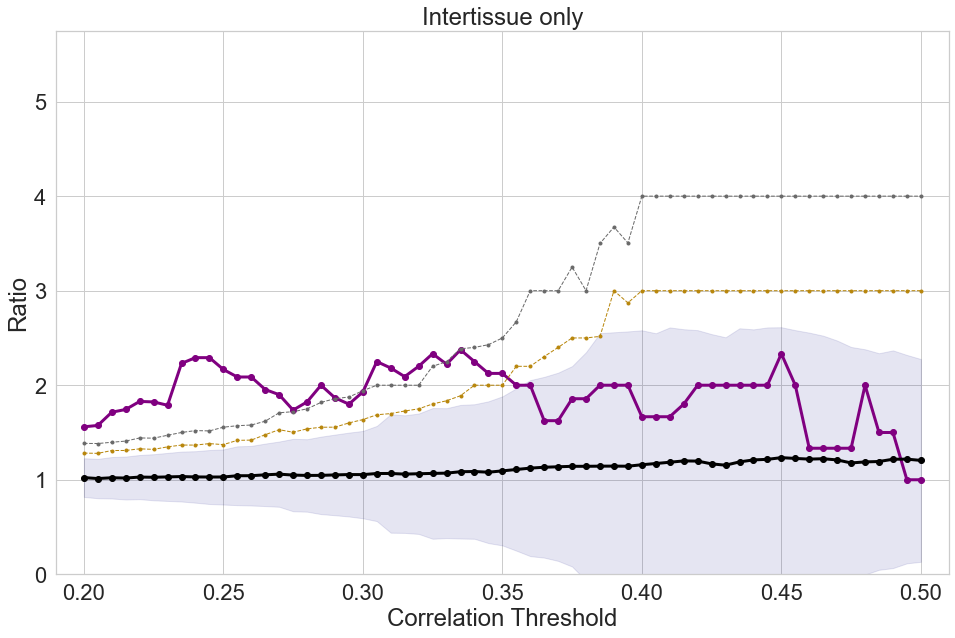

In [37]:
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))
plt.ylim(0, 5.75)
plt.yticks([0,1,2,3,4,5])
plt.xticks([0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5])
plt.xlim(0.19,0.51)

x = df_all_corr_averages.index.tolist()
met_ratio = df_metabolic['ratio pos neg'].tolist()
avg_ratio = df_all['ratios'].tolist()

#mean_ran_pos = df_all['pos cases'].tolist()
#mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratios std minus'].tolist()
upper_bound_ratio = df_all['ratios std plus'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
percentile90 = ratio_quantile90['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 




plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='purple')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=3, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=3, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')


plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')


'''
plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg ",
            "Random 95th  percentile ratio: pos /neg",
            #"Random 5th percentile: negative",
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper left",title="Correlation")
'''
            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Ratio')
plt.title('Intertissue only')
plt.savefig('4BPlus.png',dpi=600)
